In [1]:
#hide
import pandas as pd

/Users/gabriela/Research/plots/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
#hide
df = pd.read_csv("data/dtlz/dtlz-sizes.csv", sep=" ")
df["nondominated"] -= 1
df.head()

,problem,nobj,size,seed,benchmark,nondominated
0,DTLZ2,3,1000,1,1000,1000
1,DTLZ2,3,1000,2,1000,1000
2,DTLZ2,3,1000,3,1000,1000
3,DTLZ2,3,1000,4,1000,1000
4,DTLZ2,3,1000,5,1000,1000


In [5]:
#hide
df.pivot_table(index=["problem", "nobj"], columns=["size"], values=["nondominated"], aggfunc=["mean", "std"])

mean                           std                       
             nondominated                  nondominated                       
size               1000    10000    100000       1000       10000       100000
problem nobj                                                                  
DTLZ2   3           999.9  9990.8  99776.1     0.316228   2.740641   13.219934
        5          1000.0  9996.2  99899.7     0.000000   2.299758   11.215565
DTLZ4   3           105.7   864.0   7098.3     6.976946  29.192845   78.203509
        5           264.0  1991.4  16541.3    14.899664  49.569704  115.225431
DTLZ7   3           322.8  2671.3  24638.8    15.583467  42.996253  152.875258
        5           620.1  3801.5  22148.4     9.421606  44.905456  138.876604

In [6]:
#hide
import seaborn as sns
sns.set(font_scale=3)

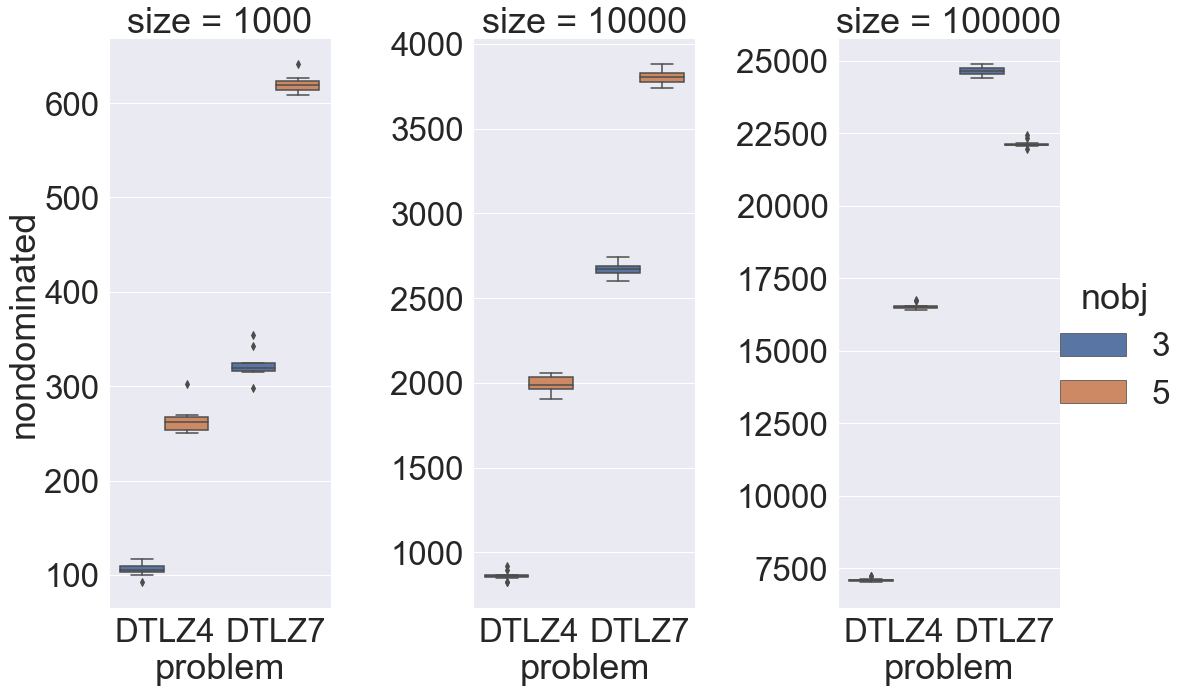

In [7]:
fig = sns.catplot(data=df.query("problem != 'DTLZ2'"),
                  x="problem",
                  y="nondominated",
                  hue="nobj",
                  col="size",
                  kind="box",
                  sharey=False,
                  aspect=0.5,
                  height=10)

In [8]:
#hide
# fig.savefig("dominated.png", dpi=600)

In [10]:
#hide
import matplotlib.pyplot as plt

names = [f"f{i+1}" for i in range(5)]
sizes = [1000,10000,100000]
colors=['r', 'g', 'b']

problems = ["DTLZ2", "DTLZ4", "DTLZ7"]
nobjs = [3, 5]

In [50]:
#hide
!ls data/dtlz

benchmark      dtlz-sizes.csv nondominated


In [35]:
#hide
def gen_maker(nobj, method="nondominated", sep="\t"):
    return (pd.read_csv(f"data/dtlz/{method}/{problem}.{nobj}.50.{size}.1.out", sep="\s+",
                        names=names[:nobj]).assign(size=size, problem=problem, nobj=nobj)
            for size in sizes
            for problem in problems)

In [36]:
#hide
df = {nobj: pd.concat(gen_maker(nobj)).groupby("problem")
       for nobj in nobjs}

In [37]:
#hide
df[3].head()

,f1,f2,f3,size,problem,nobj
0,0.998174,1.730020e-02,5.787730e-02,1000,DTLZ2,3
1,0.990326,8.616230e-02,1.087690e-01,1000,DTLZ2,3
2,0.990153,1.164490e-01,7.769140e-02,1000,DTLZ2,3
3,0.990003,7.413590e-02,1.199890e-01,1000,DTLZ2,3
4,0.989029,2.948150e-02,1.447520e-01,1000,DTLZ2,3
0,1.000000,8.355700e-107,8.392790e-268,1000,DTLZ4,3
1,1.000000,1.927210e-107,1.309900e-250,1000,DTLZ4,3
2,1.000000,7.749470e-207,1.129530e-149,1000,DTLZ4,3
3,1.000000,6.742750e-225,4.552210e-43,1000,DTLZ4,3
4,1.000000,2.258130e-252,9.205170e-40,1000,DTLZ4,3


In [38]:
#hide
def radviz_problem(df, problem, nobj=5):
    df_subset = df[nobj].get_group(problem)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
    for ax, size, color in zip(axes, sizes, colors):
        pd.plotting.radviz(df_subset.query(f"size == {size}").iloc[:,:nobj+1], 
                       "size", facecolors='none', edgecolors=color, ax=ax)
    plt.suptitle(f"{problem}.{nobj}.50")
    fig.savefig(f"{problem}.{nobj}.50.png", dpi=150)

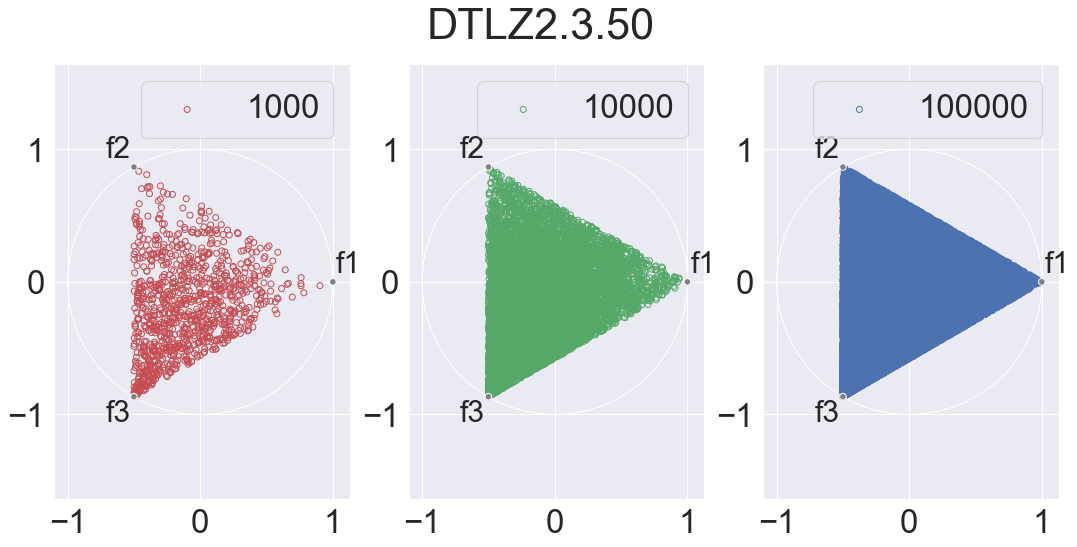

In [39]:
radviz_problem(df, "DTLZ2", 3)

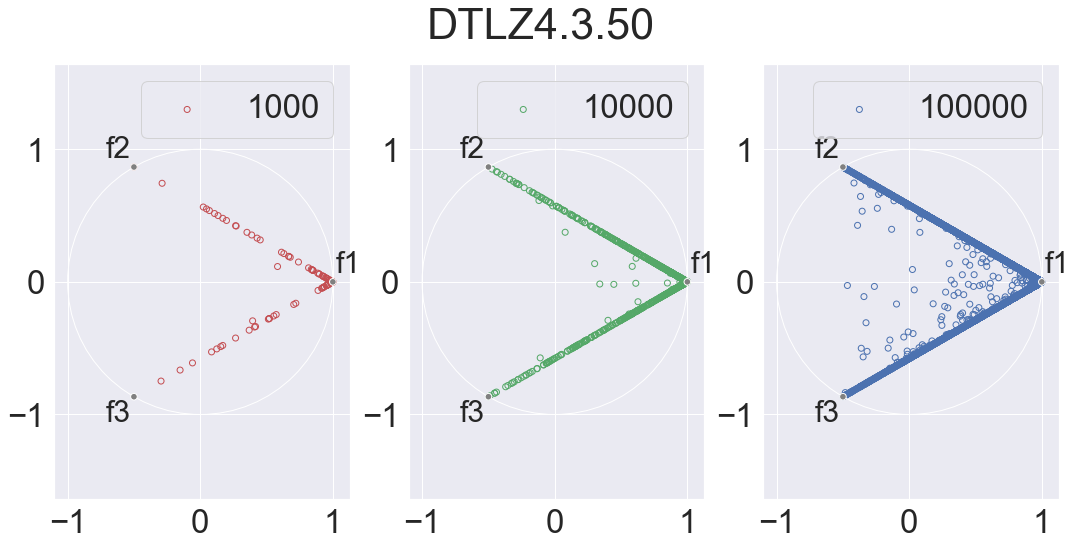

In [40]:
radviz_problem(df, "DTLZ4", 3)

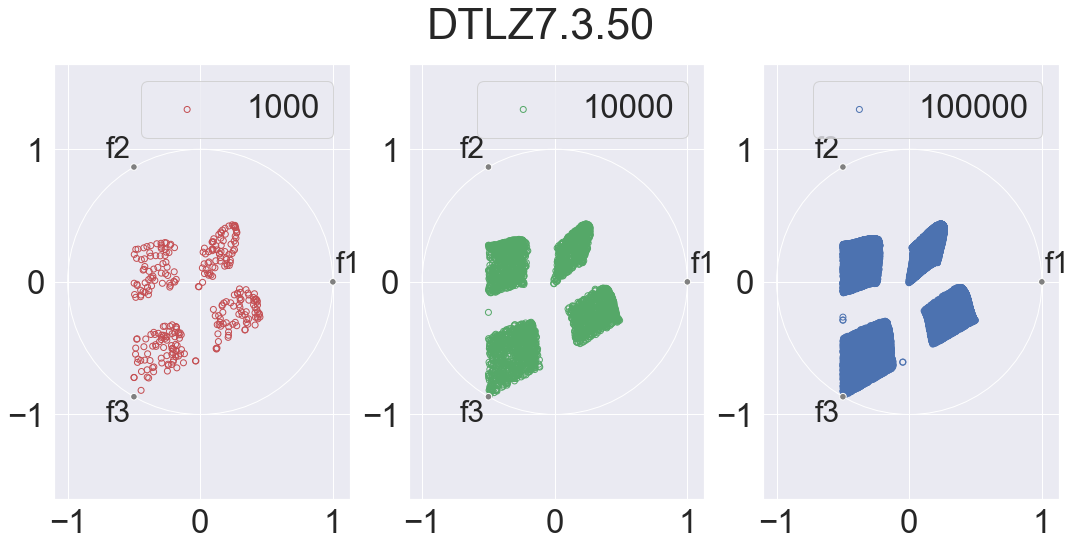

In [41]:
radviz_problem(df, "DTLZ7", 3)

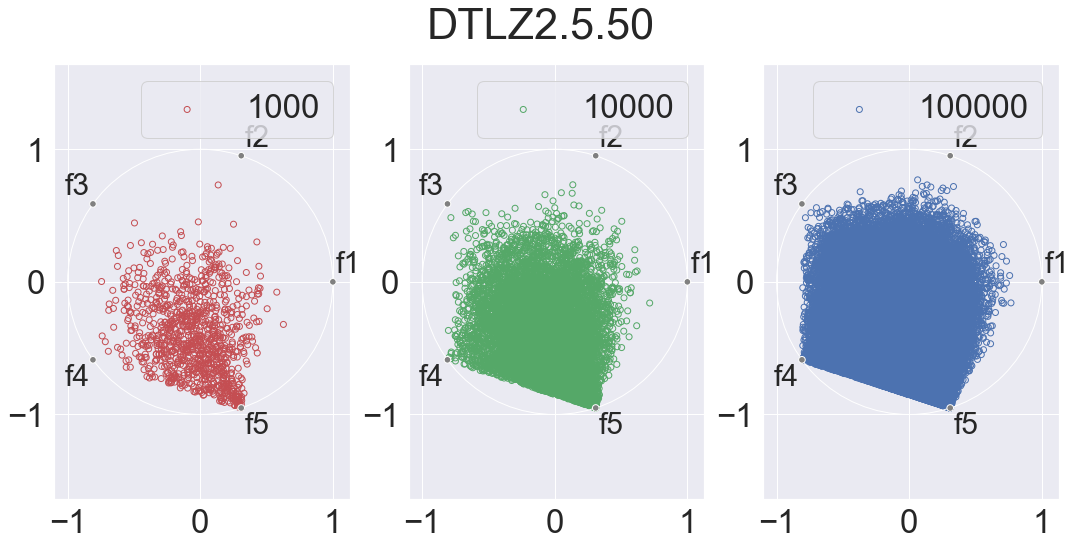

In [42]:
radviz_problem(df, "DTLZ2", 5)

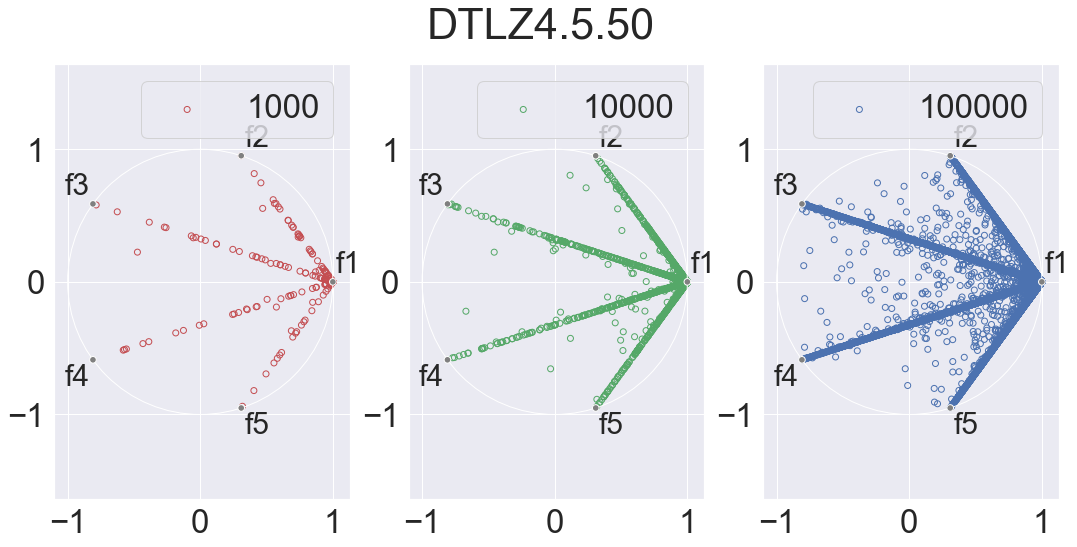

In [43]:
radviz_problem(df, "DTLZ4", 5)

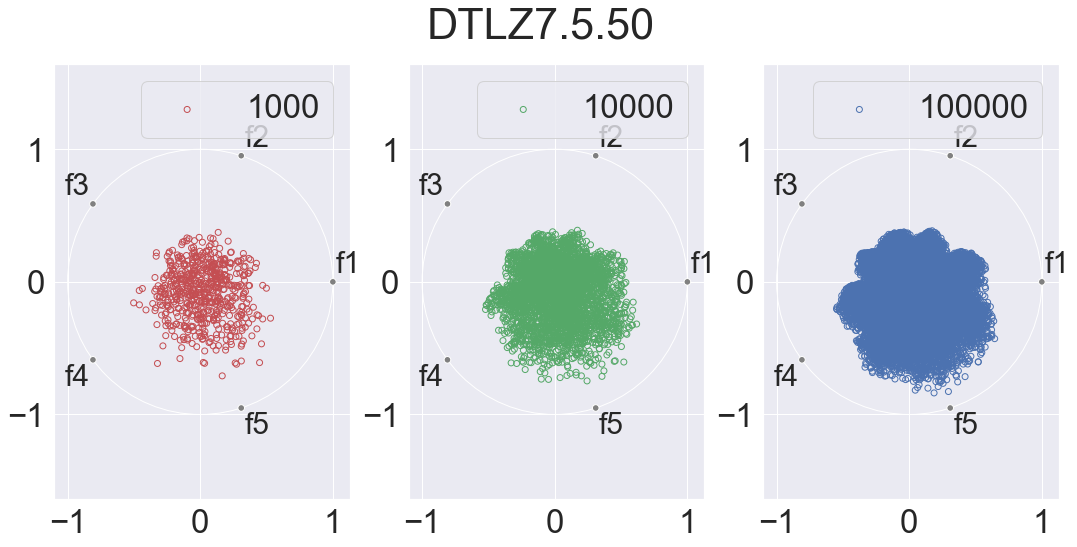

In [44]:
radviz_problem(df, "DTLZ7", 5)

In [47]:
#hide
def gen_maker_rep(nobj, problem="DTLZ2", size=1000):
    return (pd.read_csv(f"data/dtlz/benchmark/{problem}.{nobj}.50.{size}.{seed+1}.front", 
                        sep="\t", header=None, 
                        names=names[:nobj]).assign(size=size, problem=problem, nobj=nobj, seed=seed+1)
            for seed in range(10))

In [51]:
#hide
# df_reps = pd.concat(gen_maker_rep(3)).groupby("seed")

In [36]:
#hide
df_reps.get_group(1)

,f1,f2,f3,size,problem,nobj,seed
0,0.998174,0.017300,0.057877,1000,DTLZ2,3,1
1,0.990326,0.086162,0.108769,1000,DTLZ2,3,1
2,0.990153,0.116449,0.077691,1000,DTLZ2,3,1
3,0.990003,0.074136,0.119989,1000,DTLZ2,3,1
4,0.989029,0.029482,0.144752,1000,DTLZ2,3,1
...,...,...,...,...,...,...,...
995,0.000861,0.016461,0.999864,1000,DTLZ2,3,1
996,0.000854,0.851222,0.524805,1000,DTLZ2,3,1
997,0.000387,0.126292,0.991993,1000,DTLZ2,3,1
998,0.000070,0.270118,0.962827,1000,DTLZ2,3,1


In [48]:
#hide
def radviz_rep(df, problem="DTLZ2", nobj=3, size=1000):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18,24))
    for seed in range(9):
        pd.plotting.radviz(df.get_group(seed+1).iloc[:,:nobj+1], 
                       "size", facecolors='none', edgecolors='r', ax=axes[seed//3][seed%3])
    plt.suptitle(f"{problem}.{nobj}.50")
    fig.savefig(f"reps_{problem}.{nobj}.50.png", dpi=300)

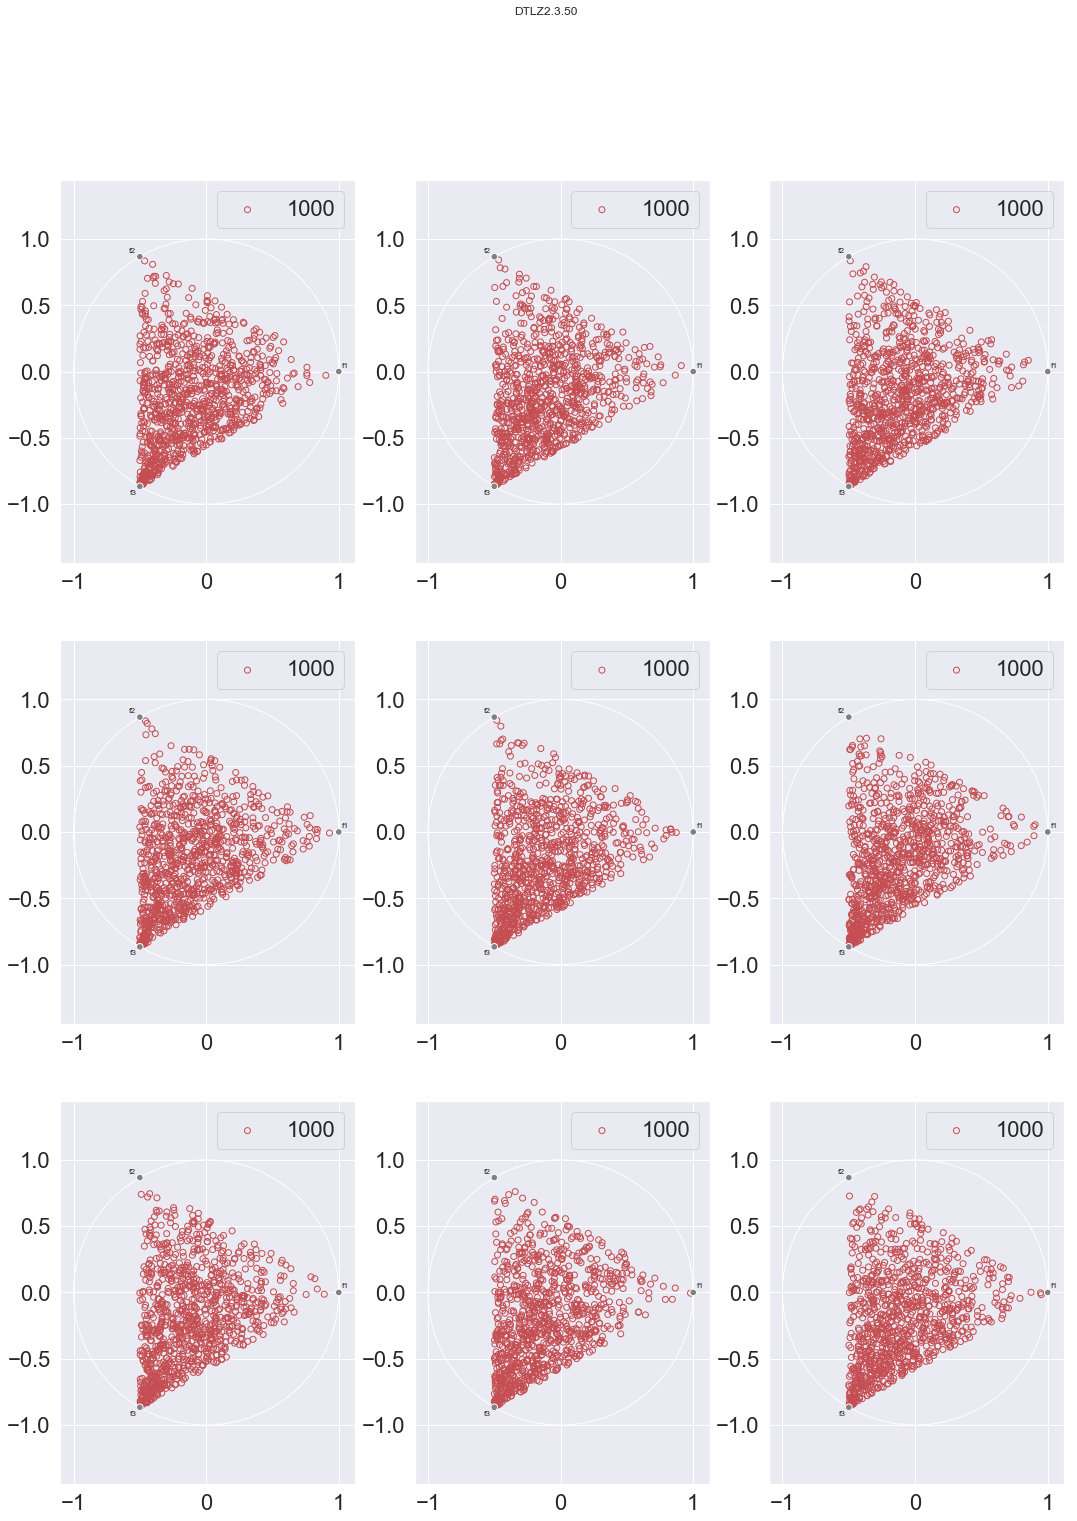

In [49]:
radviz_rep(df_reps)

In [48]:
df_mga = {nobj: pd.concat(gen_maker(nobj, "mga")).groupby("problem")
           for nobj in nobjs}

In [49]:
df_mga

{3: <pandas.core.groupby.generic.DataFrameGroupBy object at 0x11859fe10>,
 5: <pandas.core.groupby.generic.DataFrameGroupBy object at 0x1191fa048>}

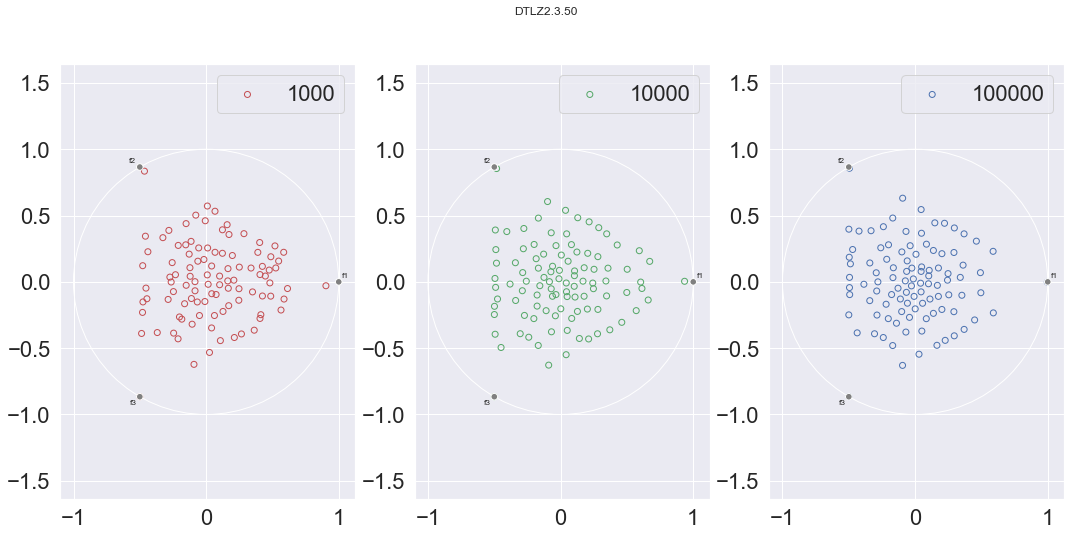

In [50]:
radviz_problem(df_mga, "DTLZ2", 3)

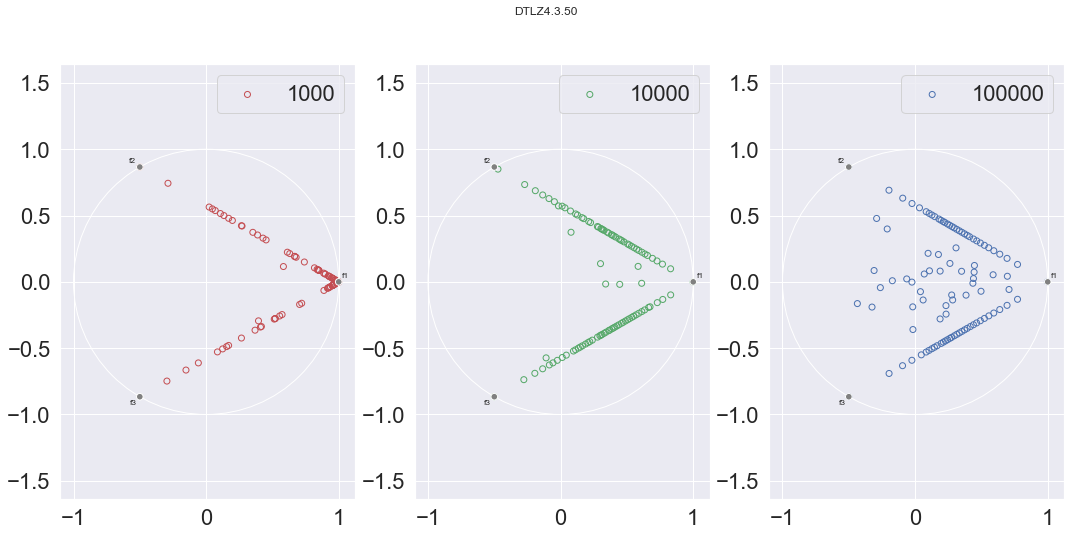

In [51]:
radviz_problem(df_mga, "DTLZ4", 3)

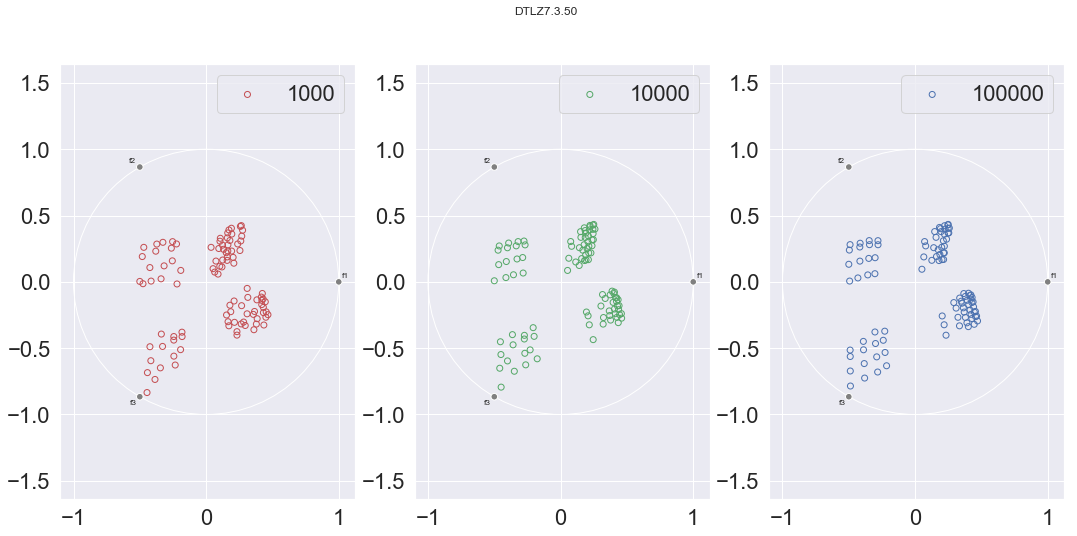

In [52]:
radviz_problem(df_mga, "DTLZ7", 3)

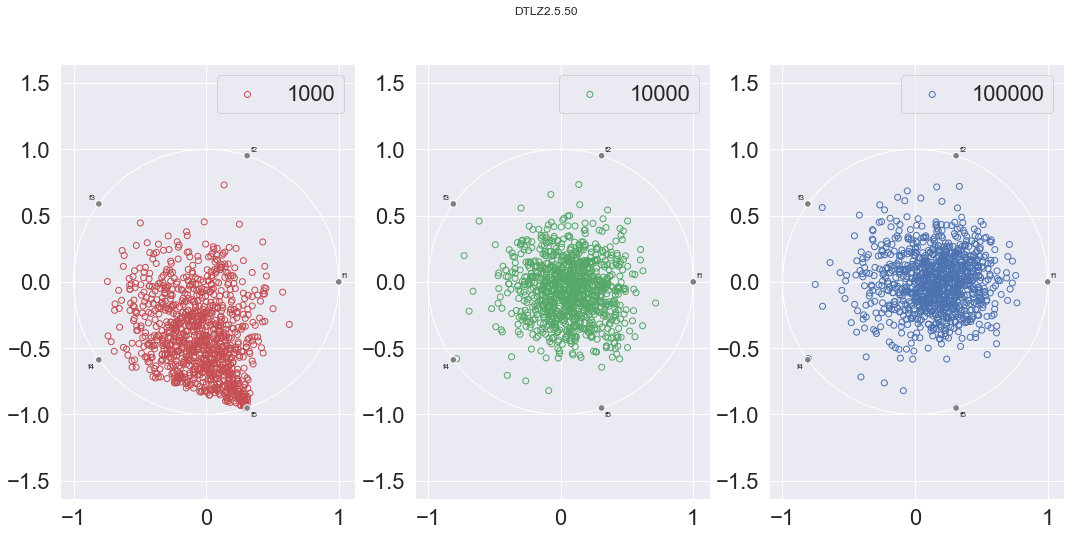

In [53]:
radviz_problem(df_mga, "DTLZ2", 5)

No handles with labels found to put in legend.


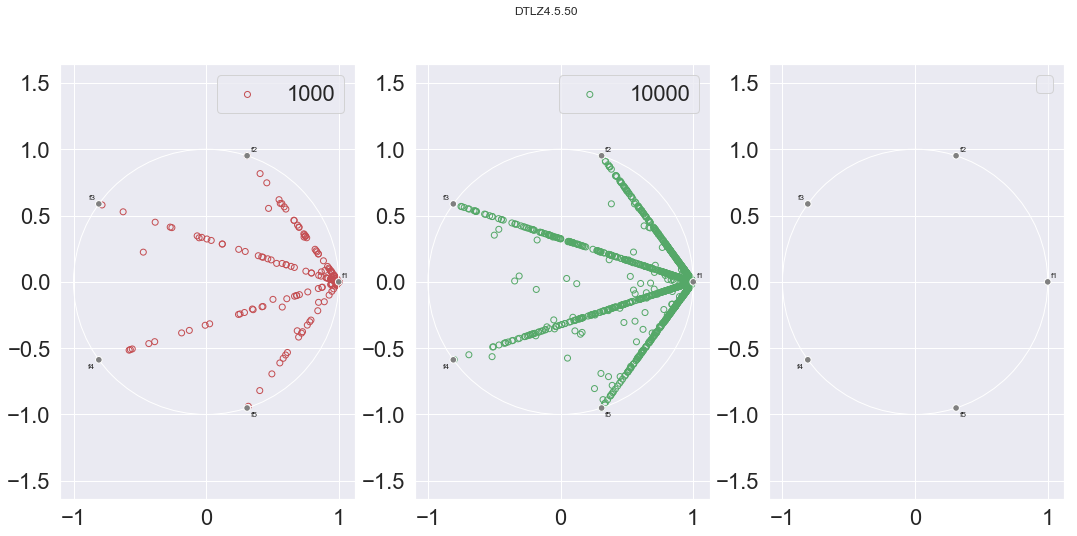

In [54]:
radviz_problem(df_mga, "DTLZ4", 5)

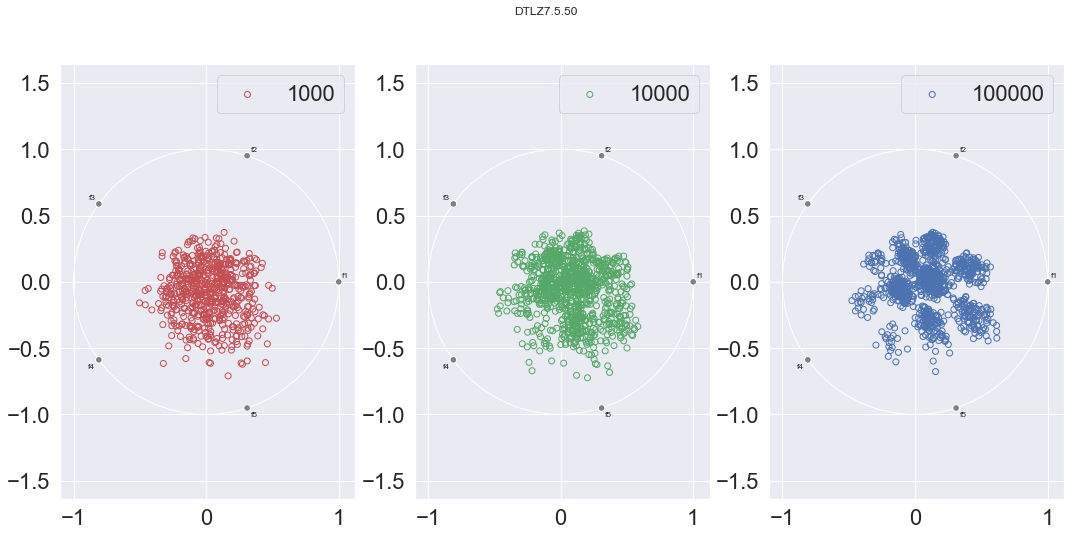

In [55]:
radviz_problem(df_mga, "DTLZ7", 5)

In [56]:
df_aas = {nobj: pd.concat(gen_maker(nobj, "aas", sep=" ")).groupby("problem")
           for nobj in nobjs}

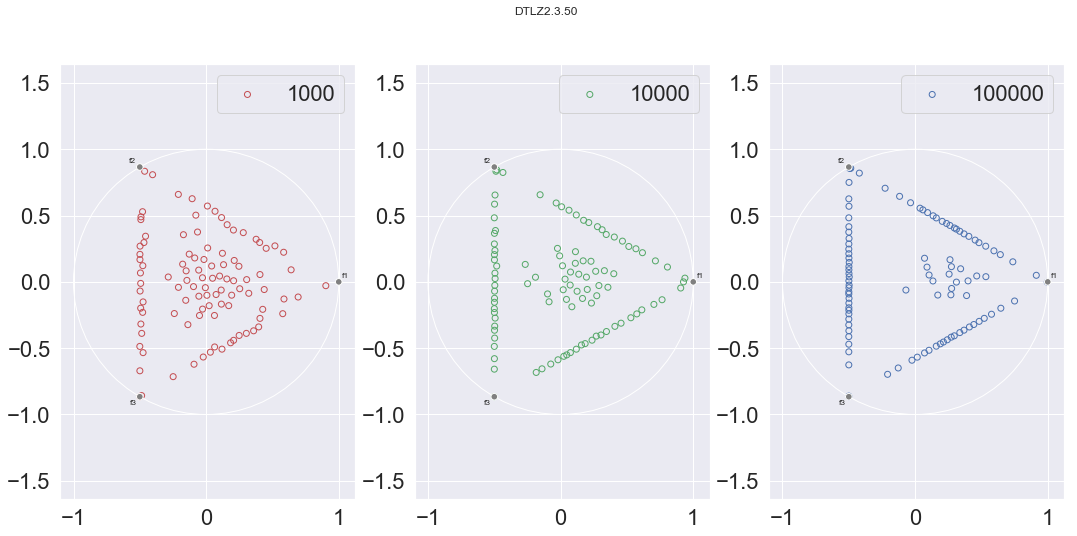

In [57]:
radviz_problem(df_aas, "DTLZ2", 3)

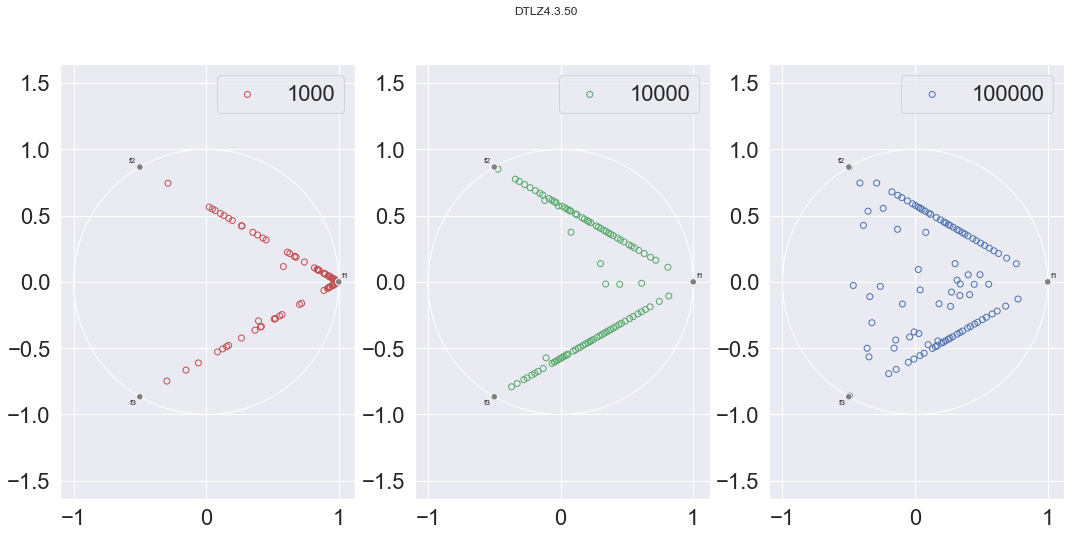

In [58]:
radviz_problem(df_aas, "DTLZ4", 3)

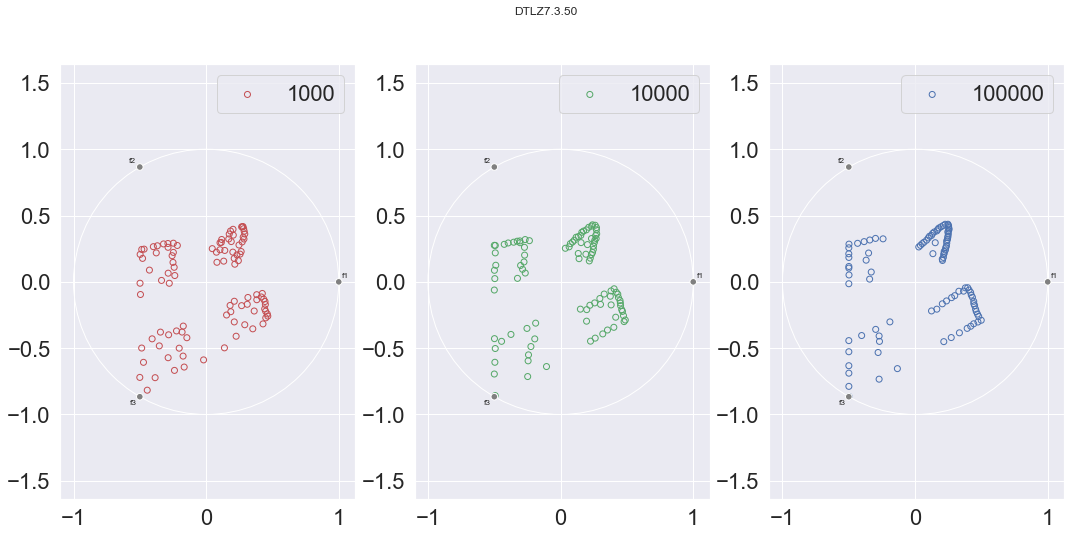

In [59]:
radviz_problem(df_aas, "DTLZ7", 3)

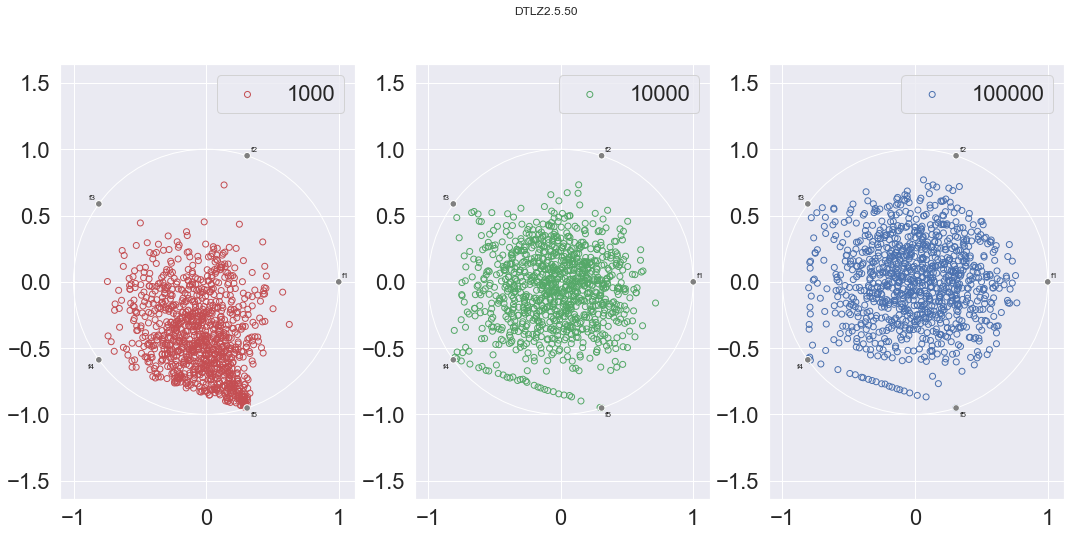

In [60]:
radviz_problem(df_aas, "DTLZ2", 5)

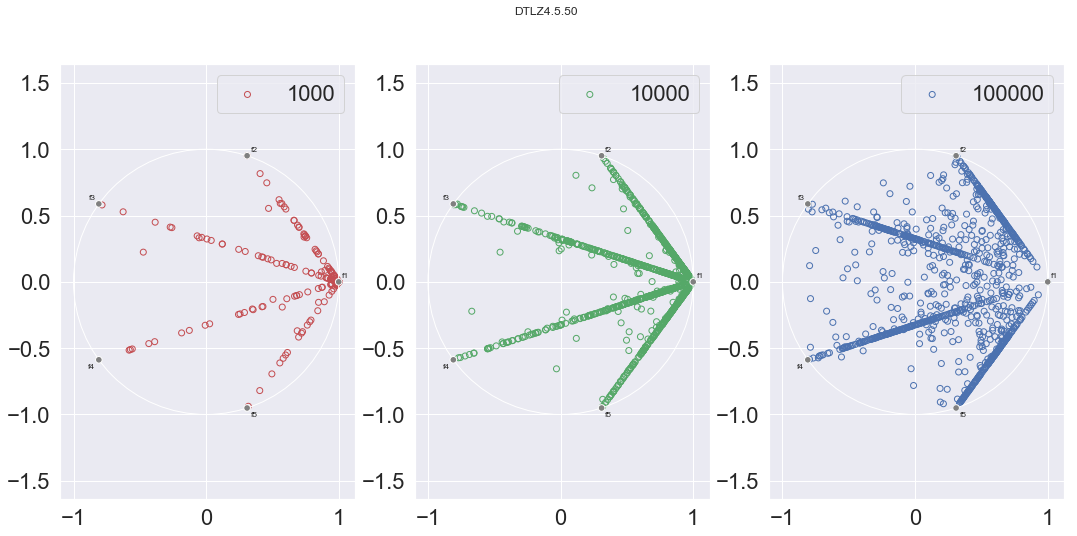

In [61]:
radviz_problem(df_aas, "DTLZ4", 5)

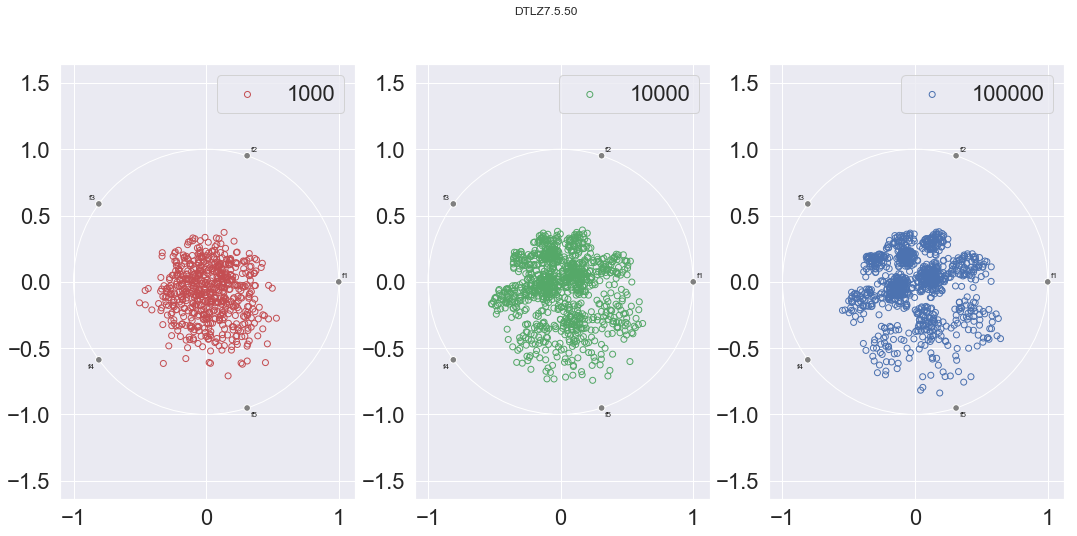

In [62]:
radviz_problem(df_aas, "DTLZ7", 5)